# LGD Calculation

## Problem Statement
The objective is to build a statistical model to estimate borrowers’ LGD.
## Goals of Case Study

As a business analyst working for a bank, you have been tasked with developing a model that can estimate borrowers’ LGD. To develop this model, you have been provided with relevant data sets that include information about defaulted accounts and the amount of money that has been retrieved from them using collaterals and other collection methods.

### Importing Libraries and  Data

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing the dataset
main_df=pd.read_csv("main_loan_base.csv")

In [3]:
main_df.shape

(50000, 15)

### Reading and Understanding the Data

In [4]:
main_df.head()

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date
0,LN79307711,Aarna Sura,"09/506, Anand Path, Ongole 646592",Consumer-Durable,21916,4929.47,3,0,3,127,2,10.1,1012.32,2019-04-14,2020-07-31
1,LN88987787,Amira Konda,"11, Dhaliwal Circle\nRaichur 659460",Two-Wheeler,121184,10254.50,1,0,0,156,2,11.8,5693.24,2015-04-14,2016-07-30
2,LN78096023,Eshani Khosla,H.No. 31\nAtwal Street\nKatihar-037896,Car,487036,116183.86,0,1,10,22,3,14.6,16788.02,2015-01-10,2015-04-18
3,LN56862431,Divij Kala,"766, Gulati Marg\nPudukkottai-051396",Two-Wheeler,52125,10310.05,5,2,9,30,2,9.6,2395.69,2018-02-07,2018-09-13
4,LN77262680,Vaibhav Bir,"55/73, Sachdev Marg\nDharmavaram-332966",Consumer-Durable,8635,1051.25,0,1,3,62,2,9.6,396.87,2014-12-25,2016-02-20


In [5]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_acc_num       50000 non-null  object 
 1   customer_name      50000 non-null  object 
 2   customer_address   50000 non-null  object 
 3   loan_type          50000 non-null  object 
 4   loan_amount        50000 non-null  int64  
 5   collateral_value   50000 non-null  float64
 6   cheque_bounces     50000 non-null  int64  
 7   number_of_loans    50000 non-null  int64  
 8   missed_repayments  50000 non-null  int64  
 9   vintage_in_months  50000 non-null  int64  
 10  tenure_years       50000 non-null  int64  
 11  interest           50000 non-null  float64
 12  monthly_emi        50000 non-null  float64
 13  disbursal_date     50000 non-null  object 
 14  default_date       50000 non-null  object 
dtypes: float64(3), int64(6), object(6)
memory usage: 5.7+ MB


In [6]:
main_df.shape

(50000, 15)

### Cleaning and Preparing the Dataset

In [7]:
#dropping Lead Number and Prospect ID since they have all unique values and they will not be much help in model building.

main_df.drop(['customer_name', 'customer_address'], 1, inplace = True)

In [8]:
main_df.loan_type.unique()

array(['Consumer-Durable', 'Two-Wheeler', 'Car', 'Personal'], dtype=object)

In [9]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_acc_num       50000 non-null  object 
 1   loan_type          50000 non-null  object 
 2   loan_amount        50000 non-null  int64  
 3   collateral_value   50000 non-null  float64
 4   cheque_bounces     50000 non-null  int64  
 5   number_of_loans    50000 non-null  int64  
 6   missed_repayments  50000 non-null  int64  
 7   vintage_in_months  50000 non-null  int64  
 8   tenure_years       50000 non-null  int64  
 9   interest           50000 non-null  float64
 10  monthly_emi        50000 non-null  float64
 11  disbursal_date     50000 non-null  object 
 12  default_date       50000 non-null  object 
dtypes: float64(3), int64(6), object(4)
memory usage: 5.0+ MB


In [10]:
# Converting date columns in datetime format
main_df['disbursal_date']=pd.to_datetime(main_df['disbursal_date'])
main_df['default_date']=pd.to_datetime(main_df['default_date'])


In [11]:
# Setting loan_acc_num as Index column
main_df.set_index('loan_acc_num', inplace=True)


In [12]:
main_df

,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date
loan_acc_num,,,,,,,,,,,,
LN79307711,Consumer-Durable,21916,4929.47,3,0,3,127,2,10.1,1012.32,2019-04-14,2020-07-31
LN88987787,Two-Wheeler,121184,10254.50,1,0,0,156,2,11.8,5693.24,2015-04-14,2016-07-30
LN78096023,Car,487036,116183.86,0,1,10,22,3,14.6,16788.02,2015-01-10,2015-04-18
LN56862431,Two-Wheeler,52125,10310.05,5,2,9,30,2,9.6,2395.69,2018-02-07,2018-09-13
LN77262680,Consumer-Durable,8635,1051.25,0,1,3,62,2,9.6,396.87,2014-12-25,2016-02-20
...,...,...,...,...,...,...,...,...,...,...,...,...
LN82044693,Two-Wheeler,222483,43088.19,2,2,8,42,2,9.6,10225.44,2021-02-03,2022-01-24
LN37968463,Two-Wheeler,104051,8666.54,6,2,9,86,3,12.6,3485.88,2013-01-12,2014-04-06
LN87152445,Two-Wheeler,51767,4101.24,1,0,4,156,2,14.0,2485.48,2016-05-01,2017-02-05


Now, LGD = (Loan Amount - (collateral Value + Sum Of Repayments))/Loan Amount, So we need to calculate sum of repayments from 2nd Dataset

In [13]:
repayments_df=pd.read_csv("repayment_base.csv")

In [14]:
repayments_df.head()

,loan_acc_num,repayment_amount,repayment_date
0,LN79307711,1012.320000,2019-05-18
1,LN79307711,667.987539,2019-06-20
2,LN79307711,1012.320000,2019-07-16
3,LN79307711,1012.320000,2019-08-16
4,LN79307711,1012.320000,2019-09-22


In [15]:
# Drpping repayment date, as it is not important
repayments_df.drop(['repayment_date'], 1, inplace = True)

In [16]:
# summing up total repayment for each loan_acc_num
repayments_df2 = repayments_df.groupby('loan_acc_num')['repayment_amount'].sum()

In [17]:
repayments_df2 =repayments_df2.to_frame()

In [18]:
# merging repayment data with main loan data base
merged_df = main_df.merge(repayments_df2[[ 'repayment_amount']], on='loan_acc_num', how='left')


In [19]:
merged_df

,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,repayment_amount
loan_acc_num,,,,,,,,,,,,,
LN79307711,Consumer-Durable,21916,4929.47,3,0,3,127,2,10.1,1012.32,2019-04-14,2020-07-31,13572.577778
LN88987787,Two-Wheeler,121184,10254.50,1,0,0,156,2,11.8,5693.24,2015-04-14,2016-07-30,96243.609484
LN78096023,Car,487036,116183.86,0,1,10,22,3,14.6,16788.02,2015-01-10,2015-04-18,74083.731181
LN56862431,Two-Wheeler,52125,10310.05,5,2,9,30,2,9.6,2395.69,2018-02-07,2018-09-13,NaN
LN77262680,Consumer-Durable,8635,1051.25,0,1,3,62,2,9.6,396.87,2014-12-25,2016-02-20,4462.514597
...,...,...,...,...,...,...,...,...,...,...,...,...,...
LN82044693,Two-Wheeler,222483,43088.19,2,2,8,42,2,9.6,10225.44,2021-02-03,2022-01-24,30676.320000
LN37968463,Two-Wheeler,104051,8666.54,6,2,9,86,3,12.6,3485.88,2013-01-12,2014-04-06,38421.067071
LN87152445,Two-Wheeler,51767,4101.24,1,0,4,156,2,14.0,2485.48,2016-05-01,2017-02-05,43784.343005


In [20]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, LN79307711 to LN46546410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   loan_type          50000 non-null  object        
 1   loan_amount        50000 non-null  int64         
 2   collateral_value   50000 non-null  float64       
 3   cheque_bounces     50000 non-null  int64         
 4   number_of_loans    50000 non-null  int64         
 5   missed_repayments  50000 non-null  int64         
 6   vintage_in_months  50000 non-null  int64         
 7   tenure_years       50000 non-null  int64         
 8   interest           50000 non-null  float64       
 9   monthly_emi        50000 non-null  float64       
 10  disbursal_date     50000 non-null  datetime64[ns]
 11  default_date       50000 non-null  datetime64[ns]
 12  repayment_amount   46023 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(6), object(1

Merging creates few nulls under repayment_amount, as there is no repayment done

In [21]:
# Replacing null with zeros
merged_df['repayment_amount'] = merged_df['repayment_amount'].replace(np.nan,0)

In [22]:
# Reading balance data base
balance_df=pd.read_csv("monthly_balance_base.csv")

In [23]:
balance_df.head()

,loan_acc_num,date,balance_amount
0,LN79307711,2010-03-26,407.343213
1,LN79307711,2010-04-25,545.431227
2,LN79307711,2010-05-25,861.932145
3,LN79307711,2010-06-24,562.082133
4,LN79307711,2010-07-24,37.768861


In [24]:
# Drpping date, as it is not important
balance_df.drop(['date'], 1, inplace = True)

In [25]:
# Taking out average balance for each loan_acc_num
balance_df2 = balance_df.groupby('loan_acc_num')['balance_amount'].mean()

In [26]:
balance_df2 =balance_df2.to_frame()

In [27]:
# Setting loan_acc_num as Index in balance dataframe
balance_df.set_index('loan_acc_num', inplace=True)


In [28]:
# Merging balance data with main loan data base
merged_df = merged_df.merge(balance_df2[[ 'balance_amount']], on='loan_acc_num', how='left')


In [29]:
merged_df

,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,repayment_amount,balance_amount
loan_acc_num,,,,,,,,,,,,,,
LN79307711,Consumer-Durable,21916,4929.47,3,0,3,127,2,10.1,1012.32,2019-04-14,2020-07-31,13572.577778,585.514569
LN88987787,Two-Wheeler,121184,10254.50,1,0,0,156,2,11.8,5693.24,2015-04-14,2016-07-30,96243.609484,7382.030208
LN78096023,Car,487036,116183.86,0,1,10,22,3,14.6,16788.02,2015-01-10,2015-04-18,74083.731181,7812.884926
LN56862431,Two-Wheeler,52125,10310.05,5,2,9,30,2,9.6,2395.69,2018-02-07,2018-09-13,0.000000,518.081369
LN77262680,Consumer-Durable,8635,1051.25,0,1,3,62,2,9.6,396.87,2014-12-25,2016-02-20,4462.514597,323.679233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LN82044693,Two-Wheeler,222483,43088.19,2,2,8,42,2,9.6,10225.44,2021-02-03,2022-01-24,30676.320000,4512.206729
LN37968463,Two-Wheeler,104051,8666.54,6,2,9,86,3,12.6,3485.88,2013-01-12,2014-04-06,38421.067071,1501.418836
LN87152445,Two-Wheeler,51767,4101.24,1,0,4,156,2,14.0,2485.48,2016-05-01,2017-02-05,43784.343005,2910.573780


In [30]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, LN79307711 to LN46546410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   loan_type          50000 non-null  object        
 1   loan_amount        50000 non-null  int64         
 2   collateral_value   50000 non-null  float64       
 3   cheque_bounces     50000 non-null  int64         
 4   number_of_loans    50000 non-null  int64         
 5   missed_repayments  50000 non-null  int64         
 6   vintage_in_months  50000 non-null  int64         
 7   tenure_years       50000 non-null  int64         
 8   interest           50000 non-null  float64       
 9   monthly_emi        50000 non-null  float64       
 10  disbursal_date     50000 non-null  datetime64[ns]
 11  default_date       50000 non-null  datetime64[ns]
 12  repayment_amount   50000 non-null  float64       
 13  balance_amount     49686 non-null  float64       
dt

Merging balance data creates null

In [31]:
# Checking data with null balance_amount
merged_df[merged_df['balance_amount'].isnull()]

,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,repayment_amount,balance_amount
loan_acc_num,,,,,,,,,,,,,,
LN87560768,Car,1390291,230656.14,1,3,4,106,2,10.6,64540.57,2017-09-09,2018-11-18,7.099463e+05,NaN
LN16066216,Personal,100265,3468.05,3,2,6,15,2,13.0,4766.78,2015-07-24,2016-09-25,5.037287e+04,NaN
LN84808750,Two-Wheeler,260720,46110.68,0,0,8,111,4,12.3,6904.22,2014-04-09,2015-12-14,1.450793e+05,NaN
LN39576568,Two-Wheeler,270832,61007.11,0,2,10,60,2,11.8,12723.72,2012-11-16,2014-05-26,8.648076e+04,NaN
LN83745919,Consumer-Durable,15628,2135.77,1,2,7,110,4,8.4,384.47,2016-03-24,2019-06-26,1.011920e+04,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LN52636298,Two-Wheeler,59525,16559.81,0,0,1,147,3,12.3,1985.62,2018-11-22,2020-04-10,3.545853e+04,NaN
LN39177755,Car,1853567,148900.31,3,2,3,86,2,8.9,84594.71,2014-01-29,2015-04-27,1.039702e+06,NaN
LN22537998,Car,304396,71302.71,0,0,9,131,3,14.3,10447.94,2019-11-13,2021-09-12,1.505108e+05,NaN


In [32]:
# we can drop these accounts as the monthly balance is not available.
merged_df.dropna(subset=['balance_amount'], inplace=True)

In [33]:
merged_df

,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,repayment_amount,balance_amount
loan_acc_num,,,,,,,,,,,,,,
LN79307711,Consumer-Durable,21916,4929.47,3,0,3,127,2,10.1,1012.32,2019-04-14,2020-07-31,13572.577778,585.514569
LN88987787,Two-Wheeler,121184,10254.50,1,0,0,156,2,11.8,5693.24,2015-04-14,2016-07-30,96243.609484,7382.030208
LN78096023,Car,487036,116183.86,0,1,10,22,3,14.6,16788.02,2015-01-10,2015-04-18,74083.731181,7812.884926
LN56862431,Two-Wheeler,52125,10310.05,5,2,9,30,2,9.6,2395.69,2018-02-07,2018-09-13,0.000000,518.081369
LN77262680,Consumer-Durable,8635,1051.25,0,1,3,62,2,9.6,396.87,2014-12-25,2016-02-20,4462.514597,323.679233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LN82044693,Two-Wheeler,222483,43088.19,2,2,8,42,2,9.6,10225.44,2021-02-03,2022-01-24,30676.320000,4512.206729
LN37968463,Two-Wheeler,104051,8666.54,6,2,9,86,3,12.6,3485.88,2013-01-12,2014-04-06,38421.067071,1501.418836
LN87152445,Two-Wheeler,51767,4101.24,1,0,4,156,2,14.0,2485.48,2016-05-01,2017-02-05,43784.343005,2910.573780


# EDA - I (using categorical variable)

<AxesSubplot:xlabel='loan_type', ylabel='collateral_value'>

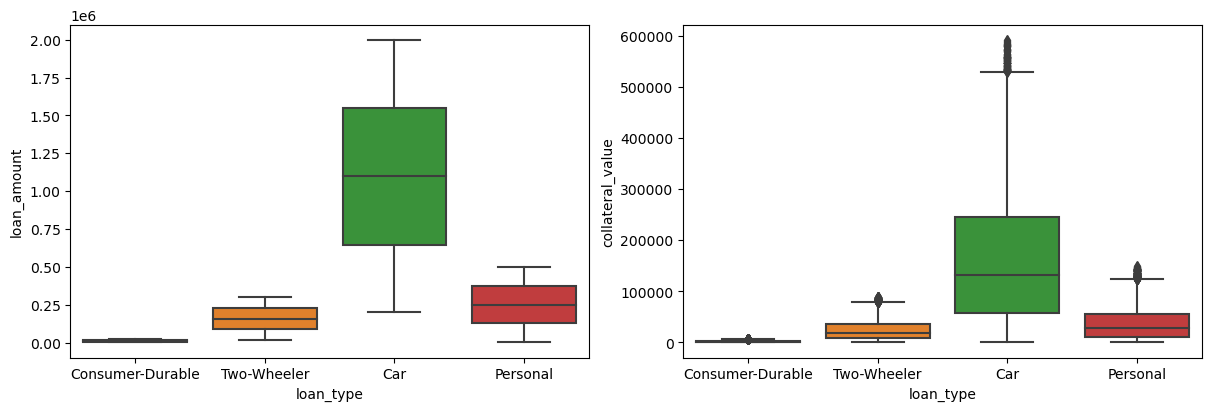

In [34]:
plt.figure(figsize=[12,4], layout='constrained')

plt.subplot(1,2,1)
sns.boxplot(x='loan_type', y='loan_amount', data=merged_df)
plt.subplot(1,2,2)
sns.boxplot(x='loan_type', y='collateral_value', data=merged_df)

- The loan amount seems to be appropriate as line with loan_type
- Also, collateral_value shows the similar pattern.
- Though, there are some outliers, these seems within limits and it may due short loan tenure or other reason.

<AxesSubplot:xlabel='loan_type', ylabel='balance_amount'>

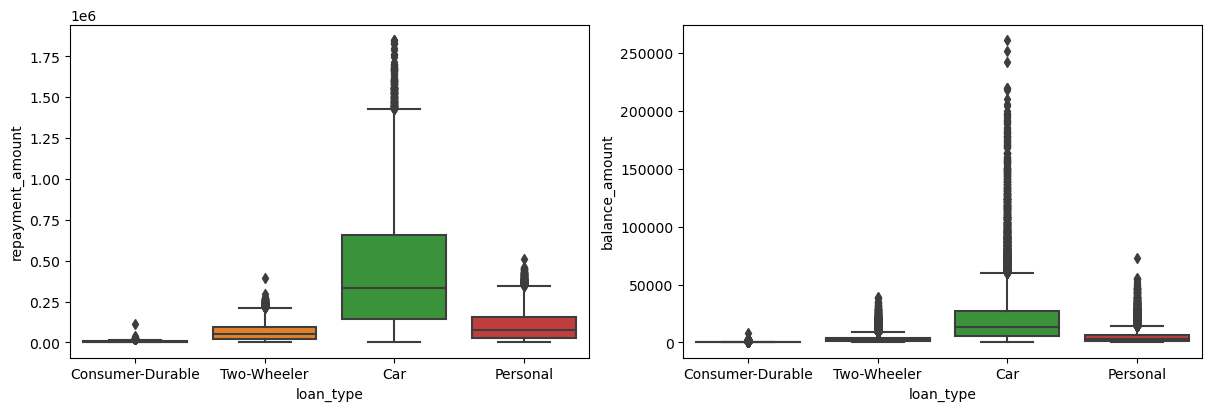

In [35]:
plt.figure(figsize=[12,4], layout='constrained')

plt.subplot(1,2,1)
sns.boxplot(x='loan_type', y='repayment_amount', data=merged_df)
plt.subplot(1,2,2)
sns.boxplot(x='loan_type', y='balance_amount', data=merged_df)

- The repayment _amount and balance_amount is in line with loan_type
- Here also, there are some outliers but that may be due to loan tenure, vintage in months or other reason. 
- It does not necessarily show abnormality.

<AxesSubplot:xlabel='loan_type', ylabel='missed_repayments'>

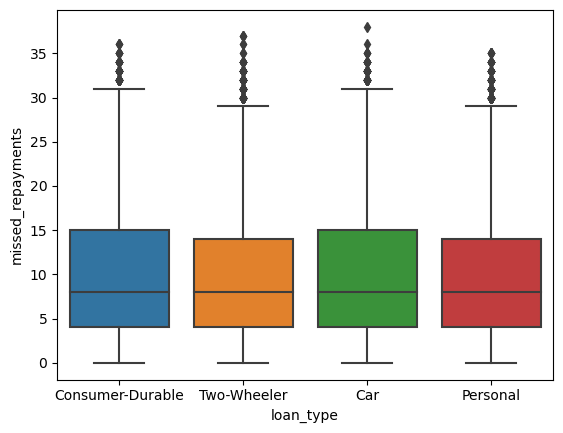

In [36]:
sns.boxplot(x='loan_type', y='missed_repayments', data=merged_df)


# Feature engineering

In [37]:
# replacing loan_type with dummies for better model development
dummy = pd.get_dummies(merged_df['loan_type'], prefix  = 'loan_type')
dummy = dummy.drop(['loan_type_Personal'], 1)
merged_df = pd.concat([merged_df, dummy], axis = 1)

In [38]:
merged_df.head()

,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,repayment_amount,balance_amount,loan_type_Car,loan_type_Consumer-Durable,loan_type_Two-Wheeler
loan_acc_num,,,,,,,,,,,,,,,,,
LN79307711,Consumer-Durable,21916,4929.47,3,0,3,127,2,10.1,1012.32,2019-04-14,2020-07-31,13572.577778,585.514569,0,1,0
LN88987787,Two-Wheeler,121184,10254.50,1,0,0,156,2,11.8,5693.24,2015-04-14,2016-07-30,96243.609484,7382.030208,0,0,1
LN78096023,Car,487036,116183.86,0,1,10,22,3,14.6,16788.02,2015-01-10,2015-04-18,74083.731181,7812.884926,1,0,0
LN56862431,Two-Wheeler,52125,10310.05,5,2,9,30,2,9.6,2395.69,2018-02-07,2018-09-13,0.000000,518.081369,0,0,1
LN77262680,Consumer-Durable,8635,1051.25,0,1,3,62,2,9.6,396.87,2014-12-25,2016-02-20,4462.514597,323.679233,0,1,0


In [39]:
# dropping loan_type column as we already have done feature engineering on them.
merged_df.drop(['loan_type'], 1, inplace = True)

In [40]:
merged_df.head()

,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,repayment_amount,balance_amount,loan_type_Car,loan_type_Consumer-Durable,loan_type_Two-Wheeler
loan_acc_num,,,,,,,,,,,,,,,,
LN79307711,21916,4929.47,3,0,3,127,2,10.1,1012.32,2019-04-14,2020-07-31,13572.577778,585.514569,0,1,0
LN88987787,121184,10254.50,1,0,0,156,2,11.8,5693.24,2015-04-14,2016-07-30,96243.609484,7382.030208,0,0,1
LN78096023,487036,116183.86,0,1,10,22,3,14.6,16788.02,2015-01-10,2015-04-18,74083.731181,7812.884926,1,0,0
LN56862431,52125,10310.05,5,2,9,30,2,9.6,2395.69,2018-02-07,2018-09-13,0.000000,518.081369,0,0,1
LN77262680,8635,1051.25,0,1,3,62,2,9.6,396.87,2014-12-25,2016-02-20,4462.514597,323.679233,0,1,0


In [41]:
merged_df.columns

Index(['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi', 'disbursal_date', 'default_date', 'repayment_amount',
       'balance_amount', 'loan_type_Car', 'loan_type_Consumer-Durable',
       'loan_type_Two-Wheeler'],
      dtype='object')

In [42]:
# adding LGD column by calculating the same
merged_df['LGD'] = (merged_df.loan_amount - (merged_df.collateral_value+merged_df.repayment_amount))/merged_df.loan_amount

In [43]:
merged_df[merged_df.LGD<0]

,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,repayment_amount,balance_amount,loan_type_Car,loan_type_Consumer-Durable,loan_type_Two-Wheeler,LGD
loan_acc_num,,,,,,,,,,,,,,,,,
LN99724320,17201,1535.58,0,0,4,130,1,10.0,1512.24,2018-10-30,2019-06-13,1.597605e+04,179.085109,0,1,0,-0.018059
LN95500511,181717,10268.46,2,3,10,126,4,9.3,4547.97,2015-02-22,2017-08-15,1.991090e+05,1603.731497,0,0,1,-0.152217
LN19333241,133250,35603.07,1,0,2,141,1,8.0,11591.21,2019-12-23,2020-06-24,1.011429e+05,8017.436423,0,0,0,-0.026236
LN49473834,50320,4957.52,3,0,0,193,1,14.0,4518.09,2014-09-11,2014-12-20,4.545089e+04,2346.057457,0,0,0,-0.001757
LN83438528,1023866,303917.69,1,0,0,109,1,11.0,90490.98,2012-07-26,2013-01-04,7.239278e+05,119180.635982,1,0,0,-0.003887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LN64646954,1853481,120991.52,0,0,0,134,1,9.7,162691.93,2013-01-14,2013-06-22,1.745316e+06,107626.484180,1,0,0,-0.006920
LN50179117,266791,14173.80,0,0,0,130,1,12.8,23804.02,2013-12-21,2014-03-25,2.565599e+05,20413.472516,1,0,0,-0.014778
LN79559820,17452,1085.78,1,0,0,164,1,8.4,1521.35,2015-10-01,2016-06-12,1.671163e+04,720.740677,0,1,0,-0.019792


There are some records with negative LGD, which may be due to high collateral value combined with repayment amount.

In [44]:
# Removing records with negative LGD
merged_df = merged_df[merged_df['LGD'] >= 0]

In [45]:
merged_df[merged_df.LGD<0]

,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,repayment_amount,balance_amount,loan_type_Car,loan_type_Consumer-Durable,loan_type_Two-Wheeler,LGD
loan_acc_num,,,,,,,,,,,,,,,,,


In [46]:
#calculate date beteen default and disbursal
merged_df['days_difference'] = (merged_df['default_date']-merged_df['disbursal_date']).dt.days
merged_df.drop(['default_date','disbursal_date'], 1, inplace = True)


In [47]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49585 entries, LN79307711 to LN46546410
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amount                 49585 non-null  int64  
 1   collateral_value            49585 non-null  float64
 2   cheque_bounces              49585 non-null  int64  
 3   number_of_loans             49585 non-null  int64  
 4   missed_repayments           49585 non-null  int64  
 5   vintage_in_months           49585 non-null  int64  
 6   tenure_years                49585 non-null  int64  
 7   interest                    49585 non-null  float64
 8   monthly_emi                 49585 non-null  float64
 9   repayment_amount            49585 non-null  float64
 10  balance_amount              49585 non-null  float64
 11  loan_type_Car               49585 non-null  uint8  
 12  loan_type_Consumer-Durable  49585 non-null  uint8  
 13  loan_type_Two-Wheeler 

In [48]:
merged_df['collateral_value'] = merged_df['collateral_value'].astype(int)
merged_df['monthly_emi'] = merged_df['monthly_emi'].astype(int)
merged_df['repayment_amount'] = merged_df['repayment_amount'].astype(int)
merged_df['balance_amount'] = merged_df['balance_amount'].astype(int)

In [49]:
merged_df

,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,repayment_amount,balance_amount,loan_type_Car,loan_type_Consumer-Durable,loan_type_Two-Wheeler,LGD,days_difference
loan_acc_num,,,,,,,,,,,,,,,,
LN79307711,21916,4929,3,0,3,127,2,10.1,1012,13572,585,0,1,0,0.155774,474
LN88987787,121184,10254,1,0,0,156,2,11.8,5693,96243,7382,0,0,1,0.121187,473
LN78096023,487036,116183,0,1,10,22,3,14.6,16788,74083,7812,1,0,0,0.609336,98
LN56862431,52125,10310,5,2,9,30,2,9.6,2395,0,518,0,0,1,0.802205,218
LN77262680,8635,1051,0,1,3,62,2,9.6,396,4462,323,0,1,0,0.361463,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LN82044693,222483,43088,2,2,8,42,2,9.6,10225,30676,4512,0,0,1,0.668449,355
LN37968463,104051,8666,6,2,9,86,3,12.6,3485,38421,1501,0,0,1,0.547456,449
LN87152445,51767,4101,1,0,4,156,2,14.0,2485,43784,2910,0,0,1,0.074979,280


# EDA - II (using Numerical variables)

In [50]:
num_col = merged_df.select_dtypes('number').columns.to_list()

In [51]:
num_col

['loan_amount',
 'collateral_value',
 'cheque_bounces',
 'number_of_loans',
 'missed_repayments',
 'vintage_in_months',
 'tenure_years',
 'interest',
 'monthly_emi',
 'repayment_amount',
 'balance_amount',
 'loan_type_Car',
 'loan_type_Consumer-Durable',
 'loan_type_Two-Wheeler',
 'LGD',
 'days_difference']

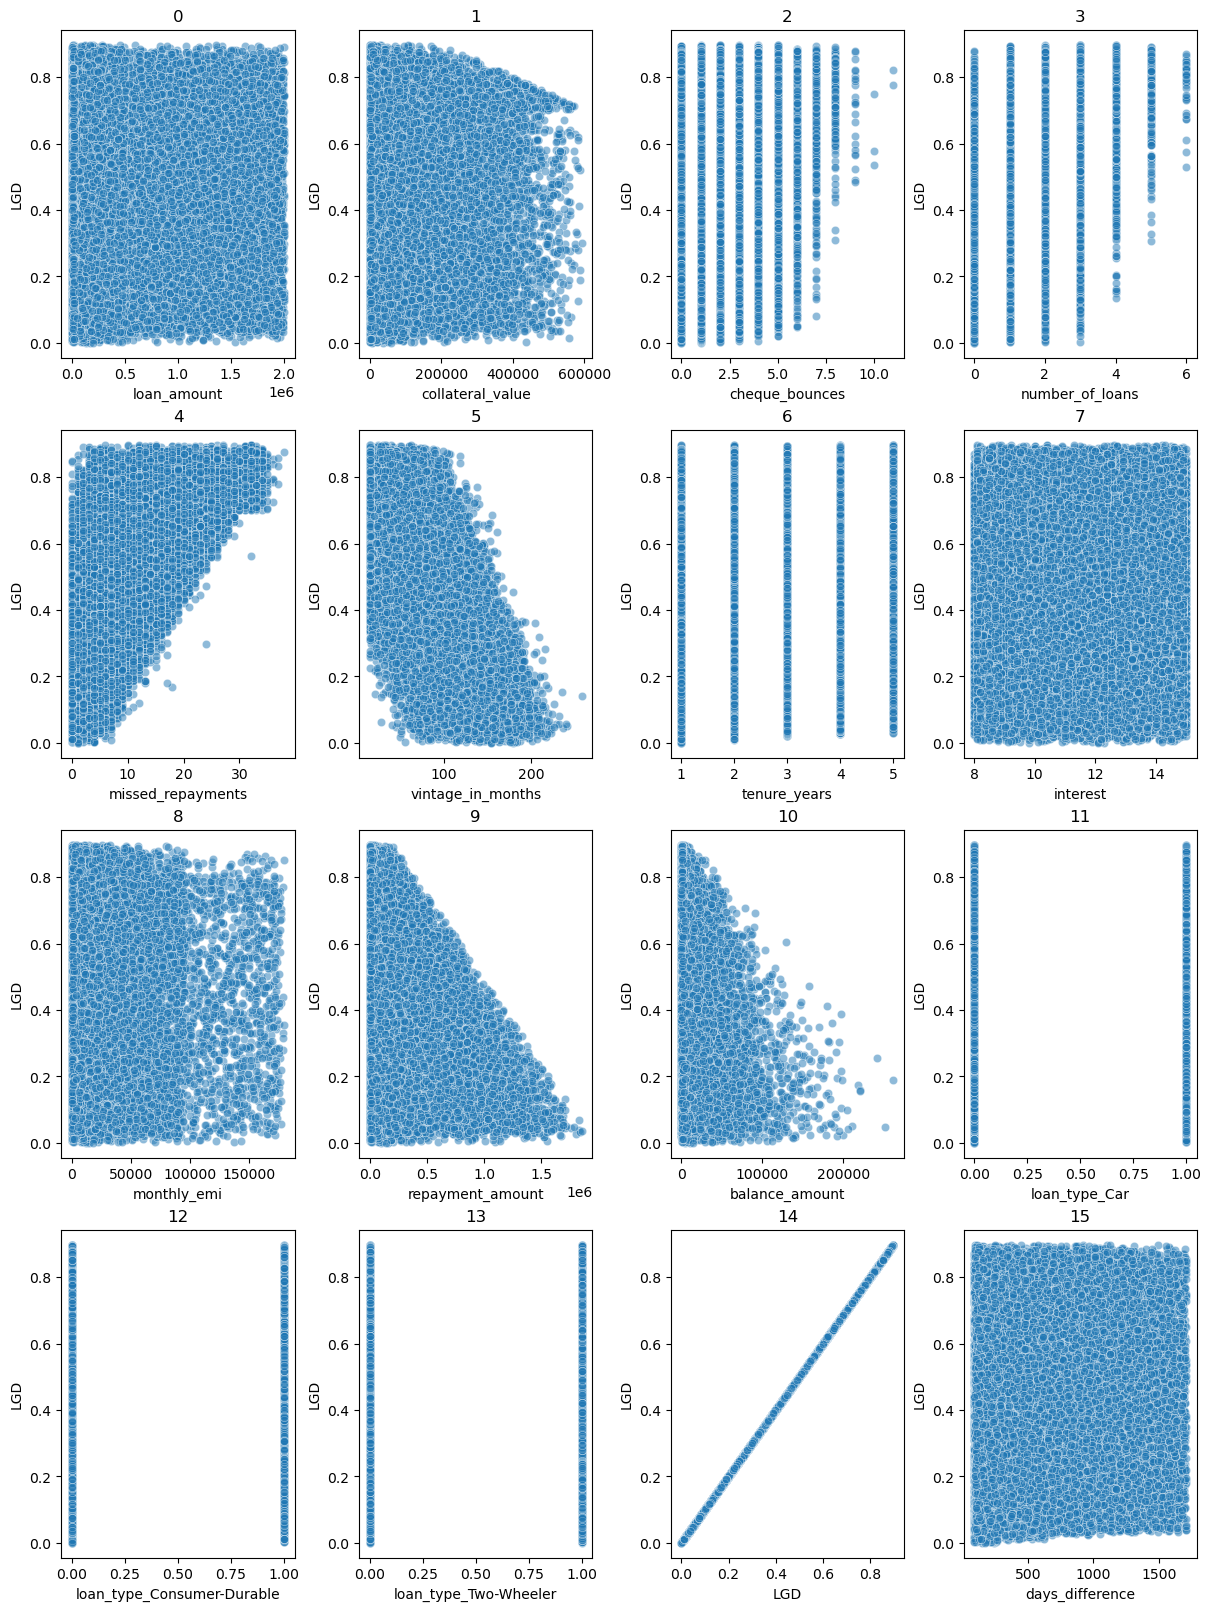

In [52]:
# Plotting LGD against other numeric variables to see relationship.
c=1
plt.figure(figsize=[12,16], layout='constrained')
for i, col in enumerate(num_col):
    plt.subplot(4,4,c)
    sns.scatterplot(x=col, y='LGD', data=merged_df, alpha=0.5)
    plt.title(i)
    c=c+1

##### LGD relationship from scatter plot

Following can be noted from the above scatter plots.
- LGD is highly related to collateral amount and repayment amount. This is very obvious as the equation of LGD has these variables.
- As the cheque_bounces goes beyond 6, LGD starts increasing linearly.
- As the number of loans goes 4 and beyond, LGD increases
- Number of missed repayments is also highly related to higher LGD
- As Vintage in months grow, LGD comes down.
- Also as balance amount increases, LGD is decreasing
- Loan amount, loan type, monthly emi and interest does not seem to be impacting LGD.

Let us look at the correlation and heatmap before building the model.

In [53]:
merged_df_corr = merged_df.corr()

In [54]:
merged_df_corr

,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,repayment_amount,balance_amount,loan_type_Car,loan_type_Consumer-Durable,loan_type_Two-Wheeler,LGD,days_difference
loan_amount,1.000000,0.809419,-0.001338,0.003477,0.006217,-0.005548,-0.003023,-0.003346,0.818940,0.780304,0.629170,0.822244,-0.420082,-0.254759,0.008923,0.003878
collateral_value,0.809419,1.000000,-0.002320,-0.000602,0.000407,-0.003547,-0.005416,-0.000681,0.667640,0.514945,0.514454,0.667926,-0.339327,-0.205942,-0.002852,-0.000385
cheque_bounces,-0.001338,-0.002320,1.000000,0.289267,0.276065,-0.318732,-0.004163,0.001184,-0.001549,-0.147211,-0.093858,0.000500,-0.002790,-0.000065,0.411801,-0.005041
number_of_loans,0.003477,-0.000602,0.289267,1.000000,0.455103,-0.527359,-0.005766,-0.001256,0.005848,-0.240321,-0.150426,0.005858,-0.003870,-0.000063,0.676758,-0.002495
missed_repayments,0.006217,0.000407,0.276065,0.455103,1.000000,-0.519880,0.615377,-0.004487,-0.187138,-0.240394,-0.272110,0.011490,0.004844,-0.006946,0.688006,0.403043
vintage_in_months,-0.005548,-0.003547,-0.318732,-0.527359,-0.519880,1.000000,0.003498,0.005964,-0.007631,0.272163,0.167840,-0.006125,-0.000112,-0.001379,-0.771924,0.002552
tenure_years,-0.003023,-0.005416,-0.004163,-0.005766,0.615377,0.003498,1.000000,-0.003010,-0.314307,-0.013758,-0.273272,0.000166,0.007884,-0.004664,0.034464,0.655079
interest,-0.003346,-0.000681,0.001184,-0.001256,-0.004487,0.005964,-0.003010,1.000000,0.015050,-0.001963,0.000760,0.002367,0.004032,-0.003019,-0.005704,-0.004774
monthly_emi,0.818940,0.667640,-0.001549,0.005848,-0.187138,-0.007631,-0.314307,0.015050,1.000000,0.649180,0.800908,0.674250,-0.344780,-0.208580,-0.004439,-0.202427
repayment_amount,0.780304,0.514945,-0.147211,-0.240321,-0.240394,0.272163,-0.013758,-0.001963,0.649180,1.000000,0.716982,0.638993,-0.328831,-0.198786,-0.348352,-0.004608


<AxesSubplot:>

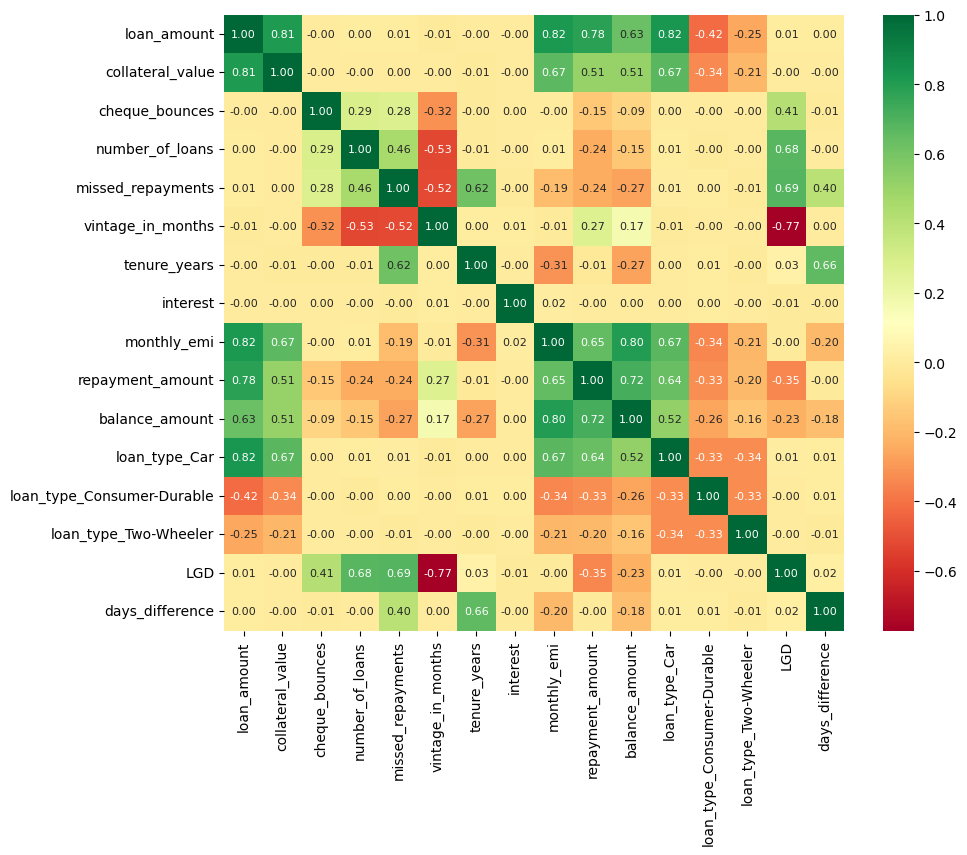

In [55]:
plt.figure(figsize=[10,8])
sns.heatmap(merged_df_corr,cmap='RdYlGn',annot=True, annot_kws = {'size':8}, fmt='.2f')

##### LGD relationship from heatmap
- LGD is negatively correlated with vintage in months with correlation factor of -0.77
- LGD is highly correlated with number of loans and missed repayments with factor of 0.68 and 0.69 respectively.
- LGD is moderately correlated with cheque bounces with factor of 0.41

Now, we can start building the model.

# Model Building

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
# Putting feature variable to X
X = merged_df.drop('LGD',axis=1)

# Putting response variable to y
y = merged_df['LGD']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((34709, 15), (14876, 15))

In [59]:
y_test.describe()


count    14876.000000
mean         0.451483
std          0.242116
min          0.000187
25%          0.241211
50%          0.453635
75%          0.670401
max          0.898123
Name: LGD, dtype: float64

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi','repayment_amount',"balance_amount",'days_difference']] = scaler.fit_transform(X_train[['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi','repayment_amount',"balance_amount",'days_difference']])
X_test[['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi','repayment_amount',"balance_amount",'days_difference']] = scaler.transform(X_test[['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi','repayment_amount',"balance_amount",'days_difference']])




In [61]:
# Adding a constant variable 
import statsmodels.api as sm  

# Below is function for calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_VIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

# Model no 1 

In [62]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize RFE object
estimator = LinearRegression()
rfe = RFE(estimator, n_features_to_select=10)  

# Fit RFE to the data
rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('loan_amount', True, 1),
 ('collateral_value', True, 1),
 ('cheque_bounces', True, 1),
 ('number_of_loans', True, 1),
 ('missed_repayments', True, 1),
 ('vintage_in_months', True, 1),
 ('tenure_years', True, 1),
 ('interest', False, 5),
 ('monthly_emi', True, 1),
 ('repayment_amount', True, 1),
 ('balance_amount', True, 1),
 ('loan_type_Car', False, 3),
 ('loan_type_Consumer-Durable', False, 2),
 ('loan_type_Two-Wheeler', False, 4),
 ('days_difference', False, 6)]

In [63]:
col1 =['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi','repayment_amount','loan_type_Car','loan_type_Consumer-Durable','loan_type_Two-Wheeler'
       ,'days_difference',"balance_amount"]
#for model number 1,let's take all the columns(not taking into consideration the RFE results yet.)

In [64]:
X_train_model1 = X_train[col1]
X_train_model1 = sm.add_constant(X_train_model1)

In [65]:
lm1 = sm.OLS(y_train,X_train_model1).fit()   # Running the linear model

In [66]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LGD   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                 1.275e+04
Date:                Mon, 01 Jan 2024   Prob (F-statistic):               0.00
Time:                        20:40:22   Log-Likelihood:                 32899.
No. Observations:               34709   AIC:                        -6.577e+04
Df Residuals:                   34693   BIC:                        -6.563e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.4515      0.001    435.035      0.000       0.449       0.454
loan_amount                    0.0486      0.002     24.657      0.000       0.045       0.052
collateral_value              -0.0204      0.001    -21.290      0.000      -0.022      -0.019
cheque_bounces                 0.0169      0.001     31.017      0.000       0.016       0.018
number_of_loans                0.0431      0.001     66.900      0.000       0.042       0.044
missed_repayments              0.1401      0.001    144.311      0.000       0.138       0.142
vintage_in_months             -0.0672      0.001    -95.469      0.000      -0.069      -0.066
tenure_years                  -0.0786      0.001    -82.377      0.000      -0.080      -0.077
interest                      -0.0010      0.001     -1.926      0.054      -0.002     1.7e-05
monthly_emi                    0.0216      0.001     15.510      0.000       0.019       0.024
repayment_amount              -0.0440      0.001    -35.269      0.000      -0.046      -0.042
loan_type_Car                  0.0018      0.002      0.833      0.405      -0.002       0.006
loan_type_Consumer-Durable    -0.0011      0.001     -0.714      0.475      -0.004       0.002
loan_type_Two-Wheeler          0.0010      0.001      0.681      0.496      -0.002       0.004
days_difference               -0.0004      0.001     -0.645      0.519      -0.002       0.001
balance_amount                -0.0246      0.001    -22.747      0.000      -0.027      -0.022
==============================================================================
Omnibus:                       99.800   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.474
Skew:                          -0.077   Prob(JB):                     8.42e-26
Kurtosis:                       3.236   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
# P value for loan type is greater than the threshold.need to remove these columns in next analysis

In [68]:
calculate_VIF(X_train_model1)

                      Features    VIF
1                  loan_amount  15.32
9                  monthly_emi   7.62
10            repayment_amount   6.15
15              balance_amount   4.61
0                        const   4.25
5            missed_repayments   3.72
2             collateral_value   3.62
7                 tenure_years   3.59
11               loan_type_Car   3.30
6            vintage_in_months   1.96
14             days_difference   1.75
12  loan_type_Consumer-Durable   1.65
4              number_of_loans   1.64
13       loan_type_Two-Wheeler   1.53
3               cheque_bounces   1.17
8                     interest   1.00


### Model 1 evaluation

In [69]:
# Creating X_test_new dataframe 
X_test_model1 = X_test[col1]
X_test_model1 = sm.add_constant(X_test_model1)

In [70]:
#### Now let's use our model lm1 to make predictionson test dataset.
y_test_pred1 = lm1.predict(X_test_model1)

<function matplotlib.pyplot.show(close=None, block=None)>

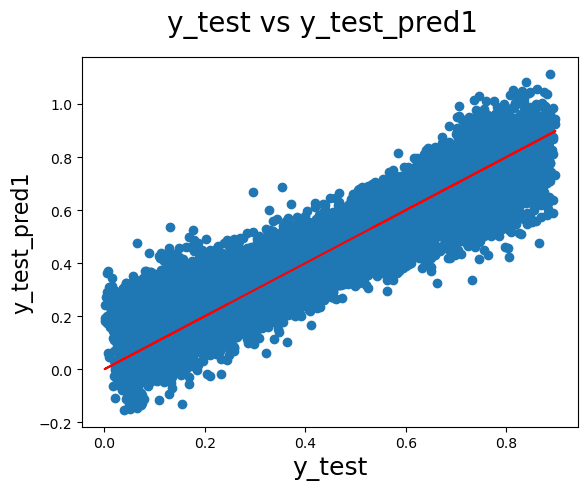

In [71]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred1)
fig.suptitle('y_test vs y_test_pred1', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred1', fontsize=16)                          # Y-label
plt.plot(y_test, y_test, color='red')
plt.show

In [72]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_test_pred1)
r_squared = r2_score(y_test, y_test_pred1)

In [73]:
r_squared

0.8488077608362478

Text(0, 0.5, 'cnt')

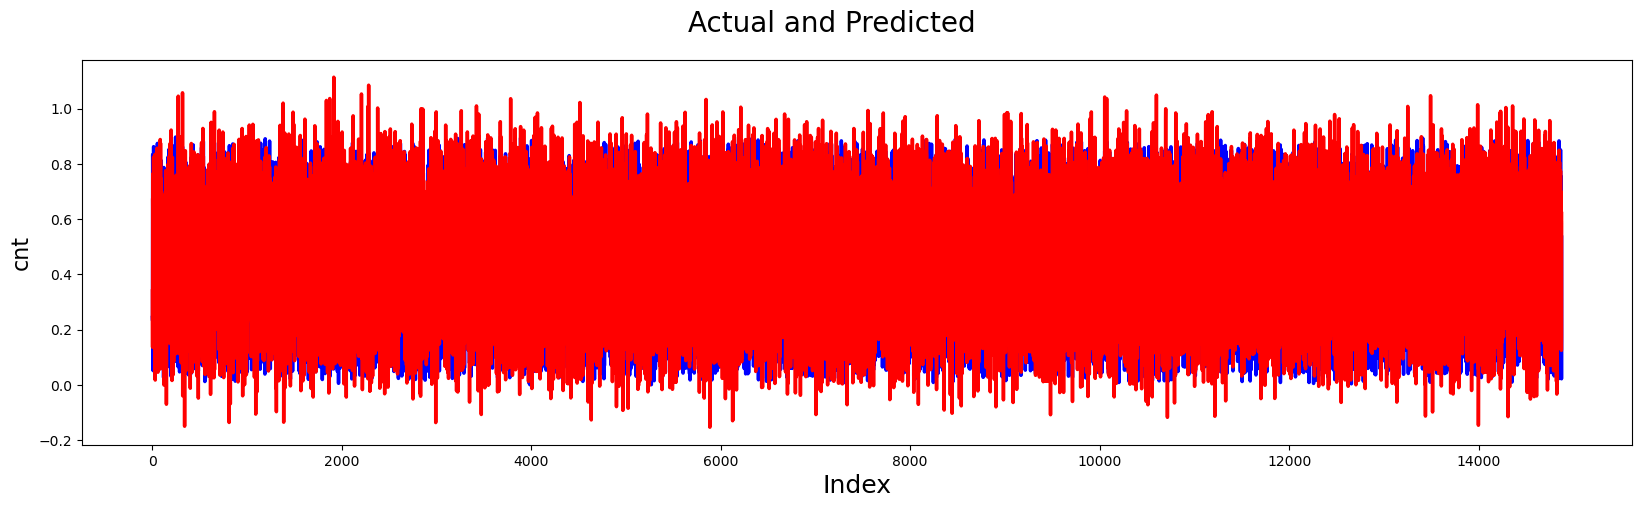

In [74]:
c = [i for i in range(1,len(y_test)+1,1)]
fig = plt.figure(figsize=(20,5))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_test_pred1, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('cnt', fontsize=16)   

# Model no 2

In [75]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize RFE object
estimator = LinearRegression()
rfe = RFE(estimator, n_features_to_select=10)  

# Fit RFE to the data
rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('loan_amount', True, 1),
 ('collateral_value', True, 1),
 ('cheque_bounces', True, 1),
 ('number_of_loans', True, 1),
 ('missed_repayments', True, 1),
 ('vintage_in_months', True, 1),
 ('tenure_years', True, 1),
 ('interest', False, 5),
 ('monthly_emi', True, 1),
 ('repayment_amount', True, 1),
 ('balance_amount', True, 1),
 ('loan_type_Car', False, 3),
 ('loan_type_Consumer-Durable', False, 2),
 ('loan_type_Two-Wheeler', False, 4),
 ('days_difference', False, 6)]

In [76]:
col2 =['collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi','repayment_amount','loan_type_Car','loan_type_Consumer-Durable','loan_type_Two-Wheeler'
       ,'days_difference']
# Dropped loan Amount as VIF factor is high for this variable and let's see the difference in the result.

In [77]:
X_train_model2 = X_train[col2]
X_train_model2 = sm.add_constant(X_train_model2)

In [78]:
lm2 = sm.OLS(y_train,X_train_model2).fit()   # Running the linear model

In [79]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LGD   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                 1.381e+04
Date:                Mon, 01 Jan 2024   Prob (F-statistic):               0.00
Time:                        20:40:24   Log-Likelihood:                 31964.
No. Observations:               34709   AIC:                        -6.390e+04
Df Residuals:                   34695   BIC:                        -6.378e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.4470      0.001    422.072      0.000       0.445       0.449
collateral_value              -0.0056      0.001     -7.214      0.000      -0.007      -0.004
cheque_bounces                 0.0177      0.001     31.640      0.000       0.017       0.019
number_of_loans                0.0458      0.001     69.465      0.000       0.044       0.047
missed_repayments              0.1417      0.001    145.524      0.000       0.140       0.144
vintage_in_months             -0.0707      0.001    -98.426      0.000      -0.072      -0.069
tenure_years                  -0.0739      0.001    -75.982      0.000      -0.076      -0.072
interest                      -0.0011      0.001     -2.159      0.031      -0.002      -0.000
monthly_emi                    0.0187      0.001     19.566      0.000       0.017       0.021
repayment_amount              -0.0371      0.001    -43.995      0.000      -0.039      -0.035
loan_type_Car                  0.0319      0.002     15.913      0.000       0.028       0.036
loan_type_Consumer-Durable    -0.0098      0.002     -6.482      0.000      -0.013      -0.007
loan_type_Two-Wheeler         -0.0024      0.001     -1.620      0.105      -0.005       0.000
days_difference               -0.0002      0.001     -0.334      0.738      -0.002       0.001
==============================================================================
Omnibus:                       66.726   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.185
Skew:                          -0.047   Prob(JB):                     1.05e-17
Kurtosis:                       3.213   Cond. No.                         7.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
calculate_VIF(X_train_model2)

                      Features   VIF
0                        const  4.19
4            missed_repayments  3.55
6                 tenure_years  3.54
8                  monthly_emi  3.41
10               loan_type_Car  2.82
9             repayment_amount  2.65
1             collateral_value  2.24
5            vintage_in_months  1.93
13             days_difference  1.75
3              number_of_loans  1.62
11  loan_type_Consumer-Durable  1.61
12       loan_type_Two-Wheeler  1.52
2               cheque_bounces  1.17
7                     interest  1.00


### Model 2 evaluation

In [81]:
# Creating X_test_new dataframe 
X_test_model2 = X_test[col2]
X_test_model2 = sm.add_constant(X_test_model2)

In [82]:
# Now let's use our model lm1 to make predictionson test dataset.
y_test_pred2 = lm2.predict(X_test_model2)

<function matplotlib.pyplot.show(close=None, block=None)>

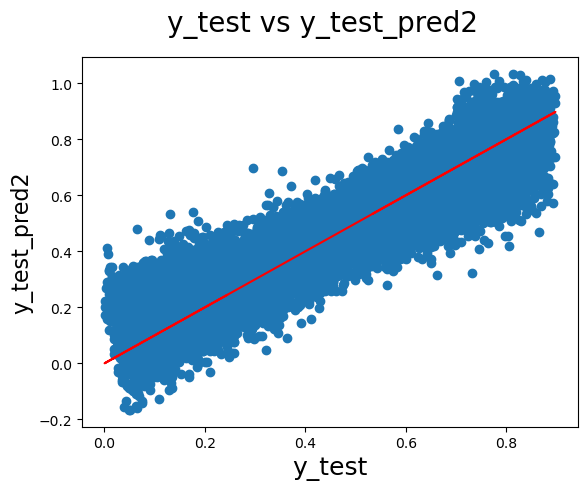

In [83]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred2)
fig.suptitle('y_test vs y_test_pred2', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred2', fontsize=16)                          # Y-label
plt.plot(y_test, y_test, color='red')
plt.show

In [84]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_test_pred2)
r_squared = r2_score(y_test, y_test_pred2)

In [85]:
r_squared

0.8401078102690702

Text(0, 0.5, 'cnt')

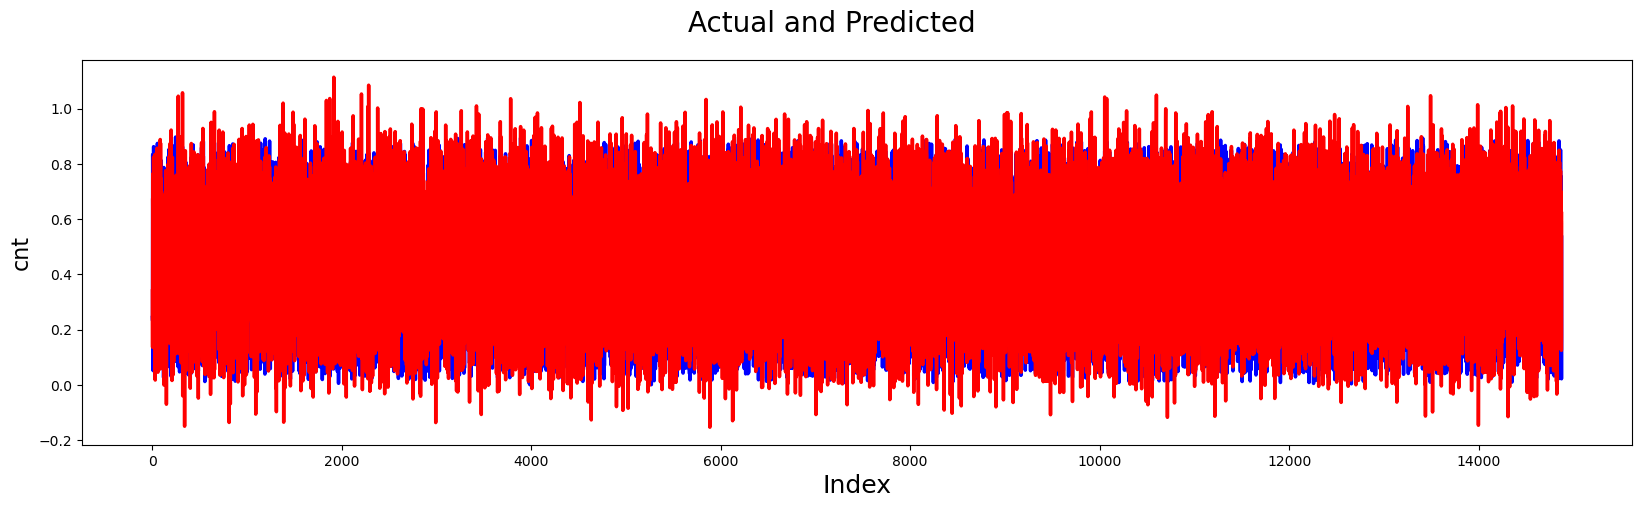

In [86]:
c = [i for i in range(1,len(y_test)+1,1)]
fig = plt.figure(figsize=(20,5))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_test_pred1, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('cnt', fontsize=16)   

# Model No 3 

In [87]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize RFE object
estimator = LinearRegression()
rfe = RFE(estimator, n_features_to_select=8)  

# Fit RFE to the data
rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('loan_amount', True, 1),
 ('collateral_value', False, 2),
 ('cheque_bounces', False, 3),
 ('number_of_loans', True, 1),
 ('missed_repayments', True, 1),
 ('vintage_in_months', True, 1),
 ('tenure_years', True, 1),
 ('interest', False, 7),
 ('monthly_emi', True, 1),
 ('repayment_amount', True, 1),
 ('balance_amount', True, 1),
 ('loan_type_Car', False, 5),
 ('loan_type_Consumer-Durable', False, 4),
 ('loan_type_Two-Wheeler', False, 6),
 ('days_difference', False, 8)]

In [88]:
col3 =['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 
       'tenure_years','repayment_amount']
# The model accuracy if previous model is good but there are still high P value variables, let's take into account the RFE results and build the model around them.

In [89]:
X_train_model3 = X_train[col3]
X_train_model3 = sm.add_constant(X_train_model3)

In [90]:
lm3 = sm.OLS(y_train,X_train_model3).fit()   # Running the linear model

In [91]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LGD   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                 2.350e+04
Date:                Mon, 01 Jan 2024   Prob (F-statistic):               0.00
Time:                        20:40:26   Log-Likelihood:                 32640.
No. Observations:               34709   AIC:                        -6.526e+04
Df Residuals:                   34700   BIC:                        -6.519e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4519      0.001    890.944      0.000       0.451       0.453
loan_amount           0.0685      0.001     48.974      0.000       0.066       0.071
collateral_value     -0.0258      0.001    -27.663      0.000      -0.028      -0.024
cheque_bounces        0.0172      0.001     31.214      0.000       0.016       0.018
number_of_loans       0.0440      0.001     67.874      0.000       0.043       0.045
missed_repayments     0.1365      0.001    141.480      0.000       0.135       0.138
vintage_in_months    -0.0684      0.001    -96.626      0.000      -0.070      -0.067
tenure_years         -0.0769      0.001    -98.321      0.000      -0.078      -0.075
repayment_amount     -0.0602      0.001    -58.221      0.000      -0.062      -0.058
==============================================================================
Omnibus:                       98.819   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.841
Skew:                          -0.075   Prob(JB):                     1.16e-25
Kurtosis:                       3.238   Cond. No.                         5.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
calculate_VIF(X_train_model3)

            Features   VIF
1        loan_amount  7.61
8   repayment_amount  4.16
5  missed_repayments  3.62
2   collateral_value  3.39
7       tenure_years  2.38
6  vintage_in_months  1.95
4    number_of_loans  1.63
3     cheque_bounces  1.17
0              const  1.00


### Model 3 evaluation

In [93]:
# Creating X_test_new dataframe 
X_test_model3 = X_test[col3]
X_test_model3 = sm.add_constant(X_test_model3)

In [94]:
# Now let's use our model lm1 to make predictionson test dataset.
y_test_pred3 = lm3.predict(X_test_model3)

<function matplotlib.pyplot.show(close=None, block=None)>

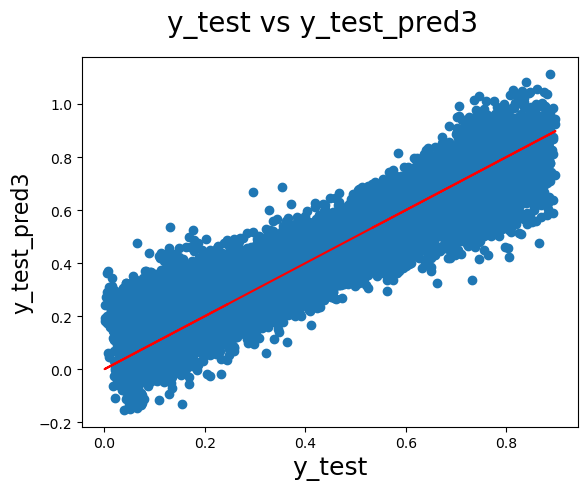

In [95]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred1)
fig.suptitle('y_test vs y_test_pred3', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred3', fontsize=16)                          # Y-label
plt.plot(y_test, y_test, color='red')
plt.show

In [96]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_test_pred3)
r_squared = r2_score(y_test, y_test_pred3)

In [97]:
r_squared

0.8466654097782558

Text(0, 0.5, 'cnt')

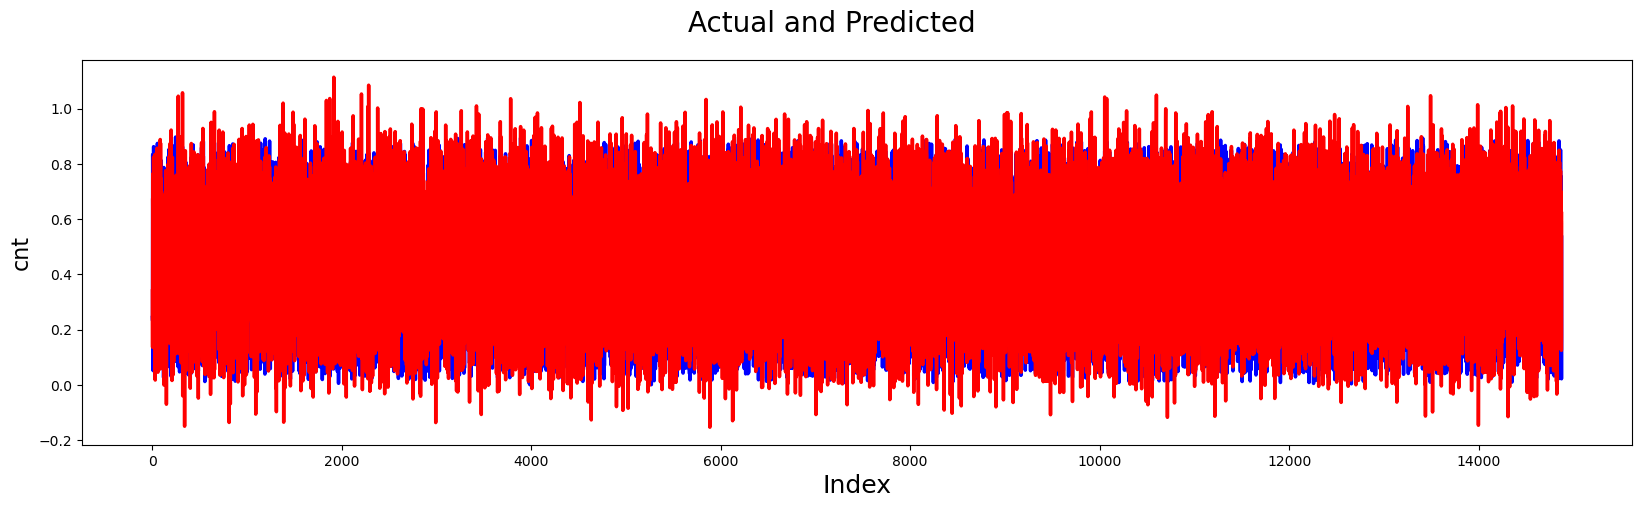

In [98]:
c = [i for i in range(1,len(y_test)+1,1)]
fig = plt.figure(figsize=(20,5))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_test_pred1, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('cnt', fontsize=16)   

# Model No 4

In [99]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize RFE object
estimator = LinearRegression()
rfe = RFE(estimator, n_features_to_select=4)  

# Fit RFE to the data
rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('loan_amount', False, 5),
 ('collateral_value', False, 6),
 ('cheque_bounces', False, 7),
 ('number_of_loans', True, 1),
 ('missed_repayments', True, 1),
 ('vintage_in_months', True, 1),
 ('tenure_years', True, 1),
 ('interest', False, 11),
 ('monthly_emi', False, 3),
 ('repayment_amount', False, 4),
 ('balance_amount', False, 2),
 ('loan_type_Car', False, 9),
 ('loan_type_Consumer-Durable', False, 8),
 ('loan_type_Two-Wheeler', False, 10),
 ('days_difference', False, 12)]

In [100]:
col4 =[ 'number_of_loans','missed_repayments','vintage_in_months','tenure_years']

# Both p values and VIF seems to be under control but let's try to reduce the number of columns used for model in order to make it as simple as possible.

In [101]:
X_train_model4 = X_train[col4]
X_train_model4 = sm.add_constant(X_train_model4)

In [102]:
lm4 = sm.OLS(y_train,X_train_model4).fit()   # Running the linear model

In [103]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LGD   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                 4.052e+04
Date:                Mon, 01 Jan 2024   Prob (F-statistic):               0.00
Time:                        20:40:27   Log-Likelihood:                 30489.
No. Observations:               34709   AIC:                        -6.097e+04
Df Residuals:                   34704   BIC:                        -6.093e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4519      0.001    837.458      0.000       0.451       0.453
number_of_loans       0.0504      0.001     73.905      0.000       0.049       0.052
missed_repayments     0.1553      0.001    158.006      0.000       0.153       0.157
vintage_in_months    -0.0771      0.001   -104.192      0.000      -0.079      -0.076
tenure_years         -0.0878      0.001   -107.952      0.000      -0.089      -0.086
==============================================================================
Omnibus:                       78.603   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.882
Skew:                          -0.062   Prob(JB):                     1.84e-20
Kurtosis:                       3.218   Cond. No.                         3.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
calculate_VIF(X_train_model4)

            Features   VIF
2  missed_repayments  3.32
4       tenure_years  2.27
3  vintage_in_months  1.88
1    number_of_loans  1.60
0              const  1.00


### Model 4 evaluation

In [105]:
# Creating X_test_new dataframe 
X_test_model4 = X_test[col4]
X_test_model4 = sm.add_constant(X_test_model4)

In [106]:
# Now let's use our model lm1 to make predictionson test dataset.
y_test_pred4 = lm4.predict(X_test_model4)

<function matplotlib.pyplot.show(close=None, block=None)>

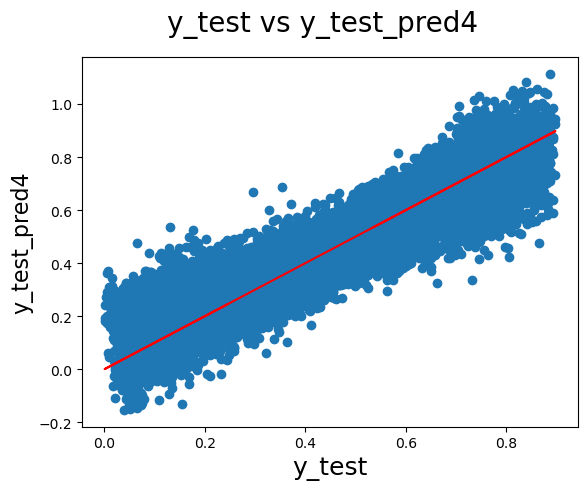

In [107]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred1)
fig.suptitle('y_test vs y_test_pred4', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred4', fontsize=16)                          # Y-label
plt.plot(y_test, y_test, color='red')
plt.show

In [108]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_test_pred4)
r_squared = r2_score(y_test, y_test_pred4)
r_squared

0.8255013848839898

Text(0, 0.5, 'cnt')

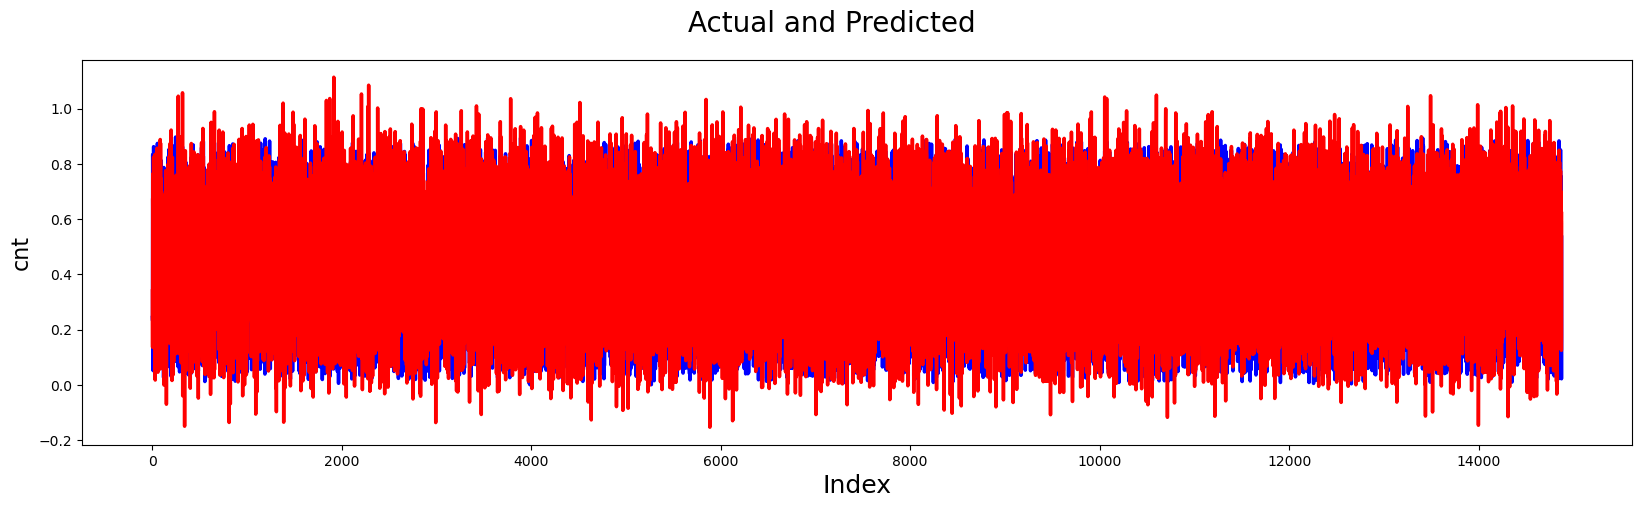

In [109]:
c = [i for i in range(1,len(y_test)+1,1)]
fig = plt.figure(figsize=(20,5))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_test_pred1, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('cnt', fontsize=16)   

In [110]:
# The model 4 gives good results and should be sufficient for our purpose of predicting LGD. the R squared value is above 80 % for both test and train datasets.

# Using Model 4 with test_main_loan_base.csv

In [111]:
# Importing the dataset
TEST_main_df=pd.read_csv("test_main_loan_base.csv")

In [112]:
TEST_main_df.head()

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date
0,LN14086568,Jayesh Kar,"83/65, Deo Circle\nBhagalpur-852841",Car,1259062,10184.09,3,1,5,103,1,12.1,111925.04,2014-11-23,2015-04-30
1,LN37082418,Kaira Chhabra,17\nSule Ganj\nAizawl 491897,Consumer-Durable,21731,2313.21,0,3,26,39,5,12.2,485.59,2014-01-11,2017-03-11
2,LN42963368,Anahita Bhargava,51/421\nKannan Chowk\nVaranasi-209999,Car,207660,8308.71,1,2,0,63,1,13.9,18635.42,2012-10-26,2013-06-23
3,LN54572294,Myra Samra,"22\nSubramanian Marg, Bhilai 850327",Two-Wheeler,193528,26432.24,4,3,12,15,2,12.5,9155.29,2021-10-07,2023-01-19
4,LN65792799,Arhaan Rana,"22, Kapoor Road\nJalandhar 667155",Consumer-Durable,5980,1641.66,1,1,0,152,1,14.6,538.62,2020-03-04,2020-10-08


### Preparing Test Dataset to apply model

In [113]:
TEST_main_df.drop(['customer_name', 'customer_address'], 1, inplace = True)

In [114]:
TEST_main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_acc_num       10000 non-null  object 
 1   loan_type          10000 non-null  object 
 2   loan_amount        10000 non-null  int64  
 3   collateral_value   10000 non-null  float64
 4   cheque_bounces     10000 non-null  int64  
 5   number_of_loans    10000 non-null  int64  
 6   missed_repayments  10000 non-null  int64  
 7   vintage_in_months  10000 non-null  int64  
 8   tenure_years       10000 non-null  int64  
 9   interest           10000 non-null  float64
 10  monthly_emi        10000 non-null  float64
 11  disbursal_date     10000 non-null  object 
 12  default_date       10000 non-null  object 
dtypes: float64(3), int64(6), object(4)
memory usage: 1015.8+ KB


In [115]:
# removing date columns as it is not useful model application
TEST_main_df['disbursal_date']=pd.to_datetime(TEST_main_df['disbursal_date'])
TEST_main_df['default_date']=pd.to_datetime(TEST_main_df['default_date'])

In [116]:
# setting loan_acc_num as index column
TEST_main_df.set_index('loan_acc_num', inplace=True)

In [117]:
TEST_main_df

,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date
loan_acc_num,,,,,,,,,,,,
LN14086568,Car,1259062,10184.09,3,1,5,103,1,12.1,111925.04,2014-11-23,2015-04-30
LN37082418,Consumer-Durable,21731,2313.21,0,3,26,39,5,12.2,485.59,2014-01-11,2017-03-11
LN42963368,Car,207660,8308.71,1,2,0,63,1,13.9,18635.42,2012-10-26,2013-06-23
LN54572294,Two-Wheeler,193528,26432.24,4,3,12,15,2,12.5,9155.29,2021-10-07,2023-01-19
LN65792799,Consumer-Durable,5980,1641.66,1,1,0,152,1,14.6,538.62,2020-03-04,2020-10-08
...,...,...,...,...,...,...,...,...,...,...,...,...
LN25049248,Personal,389184,116356.68,1,0,8,107,4,8.6,9611.11,2017-11-23,2018-03-31
LN90616761,Two-Wheeler,153260,23943.10,2,2,6,60,1,14.0,13760.77,2014-10-31,2015-04-13
LN43072538,Consumer-Durable,10696,958.95,0,1,2,162,4,8.9,265.66,2019-09-11,2021-06-14


In [118]:
# reading test test_repayment_base.csv
TEST_repayments_df=pd.read_csv("test_repayment_base.csv")

In [119]:
TEST_repayments_df.head()

,loan_acc_num,repayment_amount,repayment_date
0,LN14086568,111925.040000,2014-12-19
1,LN14086568,111925.040000,2015-01-26
2,LN14086568,111925.040000,2015-02-21
3,LN14086568,111925.040000,2015-03-20
4,LN14086568,11590.317813,2015-04-26


In [120]:
# removing date column
TEST_repayments_df.drop(['repayment_date'], 1, inplace = True)

In [121]:
# summing up the repayment_amount for each loan_acc_num
TEST_repayments_df2 = TEST_repayments_df.groupby('loan_acc_num')['repayment_amount'].sum()

In [122]:
TEST_repayments_df2 =TEST_repayments_df2.to_frame()

In [123]:
TEST_repayments_df2

,repayment_amount
loan_acc_num,
LN10011015,1725.313355
LN10028091,3560.311180
LN10033713,11582.166773
LN10045654,66181.736267
LN10051605,87664.413068
...,...
LN99908769,5424.060000
LN99928119,38873.700000
LN99974867,5196.099387


In [124]:
# merging repayment data with Test dataframe
TEST_merged_df = TEST_main_df.merge(TEST_repayments_df2[[ 'repayment_amount']], on='loan_acc_num', how='left')


In [125]:
TEST_merged_df

,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,repayment_amount
loan_acc_num,,,,,,,,,,,,,
LN14086568,Car,1259062,10184.09,3,1,5,103,1,12.1,111925.04,2014-11-23,2015-04-30,675861.052902
LN37082418,Consumer-Durable,21731,2313.21,0,3,26,39,5,12.2,485.59,2014-01-11,2017-03-11,2208.645810
LN42963368,Car,207660,8308.71,1,2,0,63,1,13.9,18635.42,2012-10-26,2013-06-23,111812.520000
LN54572294,Two-Wheeler,193528,26432.24,4,3,12,15,2,12.5,9155.29,2021-10-07,2023-01-19,18310.580000
LN65792799,Consumer-Durable,5980,1641.66,1,1,0,152,1,14.6,538.62,2020-03-04,2020-10-08,3428.641165
...,...,...,...,...,...,...,...,...,...,...,...,...,...
LN25049248,Personal,389184,116356.68,1,0,8,107,4,8.6,9611.11,2017-11-23,2018-03-31,174921.371458
LN90616761,Two-Wheeler,153260,23943.10,2,2,6,60,1,14.0,13760.77,2014-10-31,2015-04-13,13760.770000
LN43072538,Consumer-Durable,10696,958.95,0,1,2,162,4,8.9,265.66,2019-09-11,2021-06-14,9182.205289


In [126]:
TEST_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, LN14086568 to LN20788592
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   loan_type          10000 non-null  object        
 1   loan_amount        10000 non-null  int64         
 2   collateral_value   10000 non-null  float64       
 3   cheque_bounces     10000 non-null  int64         
 4   number_of_loans    10000 non-null  int64         
 5   missed_repayments  10000 non-null  int64         
 6   vintage_in_months  10000 non-null  int64         
 7   tenure_years       10000 non-null  int64         
 8   interest           10000 non-null  float64       
 9   monthly_emi        10000 non-null  float64       
 10  disbursal_date     10000 non-null  datetime64[ns]
 11  default_date       10000 non-null  datetime64[ns]
 12  repayment_amount   9232 non-null   float64       
dtypes: datetime64[ns](2), float64(4), int64(6), object(1

In [127]:
# replacing null, created after merging, with zero
TEST_merged_df['repayment_amount'] = TEST_merged_df['repayment_amount'].replace(np.nan,0)

In [128]:
# reading test_monthly_balance_base.csv
TEST_balance_df=pd.read_csv("test_monthly_balance_base.csv")

In [129]:
TEST_balance_df

,loan_acc_num,date,balance_amount
0,LN14086568,2006-12-13,9014.212689
1,LN14086568,2007-01-12,28129.516540
2,LN14086568,2007-02-11,10820.366663
3,LN14086568,2007-03-13,32491.477851
4,LN14086568,2007-04-12,24982.192310
...,...,...,...
801402,LN20788592,2015-08-16,1018.532243
801403,LN20788592,2015-09-15,817.746710
801404,LN20788592,2015-10-15,806.961874
801405,LN20788592,2015-11-14,883.821828


In [130]:
# dropping date column
TEST_balance_df.drop(['date'], 1, inplace = True)

In [131]:
# averaging balance amount per loan_acc_num
TEST_balance_df2 = TEST_balance_df.groupby('loan_acc_num')['balance_amount'].mean()

In [132]:
TEST_balance_df2 =TEST_balance_df2.to_frame()

In [133]:
# merging balance data with Test dataset
TEST_merged_df = TEST_merged_df.merge(TEST_balance_df2[[ 'balance_amount']], on='loan_acc_num', how='left')


In [134]:
# Checking for records with null 
TEST_merged_df[TEST_merged_df['balance_amount'].isnull()]


,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,repayment_amount,balance_amount
loan_acc_num,,,,,,,,,,,,,,
LN48562804,Car,588655,113334.61,0,1,0,140,1,12.0,52301.28,2012-05-02,2012-09-07,4.289552e+05,NaN
LN39955749,Consumer-Durable,23548,2516.61,2,2,3,77,1,10.9,2080.11,2015-10-13,2016-05-17,4.160220e+03,NaN
LN48348426,Car,1479373,26725.29,0,2,5,134,3,10.7,48222.87,2012-04-14,2013-02-27,1.025256e+06,NaN
LN83678845,Personal,309714,12278.30,4,3,9,91,2,8.8,14120.80,2015-04-18,2016-09-17,1.504994e+05,NaN
LN57148805,Personal,154877,45780.29,5,4,18,15,3,14.3,5315.92,2019-07-29,2022-03-02,0.000000e+00,NaN
LN60896895,Personal,194663,8139.82,0,2,2,78,1,12.7,17359.38,2016-09-16,2017-01-01,1.072209e+05,NaN
LN44029214,Two-Wheeler,30954,8592.04,2,0,19,81,5,10.9,671.47,2017-09-13,2018-05-30,9.268383e+03,NaN
LN56715729,Car,1335233,61450.55,0,1,2,46,1,14.1,119949.56,2019-05-03,2019-09-04,8.396469e+05,NaN
LN71775793,Car,1567646,391456.10,3,3,9,23,2,8.7,71401.92,2014-03-16,2015-08-09,4.284115e+05,NaN


In [135]:
# we can drop these accounts as the monthly balance is not available.
TEST_merged_df.dropna(subset=['balance_amount'], inplace=True)

In [136]:
# feature engineering for loan_type
dummy = pd.get_dummies(TEST_merged_df['loan_type'], prefix  = 'loan_type')
dummy = dummy.drop(['loan_type_Personal'], 1)
TEST_merged_df = pd.concat([TEST_merged_df, dummy], axis = 1)

In [137]:
TEST_merged_df

,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,repayment_amount,balance_amount,loan_type_Car,loan_type_Consumer-Durable,loan_type_Two-Wheeler
loan_acc_num,,,,,,,,,,,,,,,,,
LN14086568,Car,1259062,10184.09,3,1,5,103,1,12.1,111925.04,2014-11-23,2015-04-30,675861.052902,26560.585984,1,0,0
LN37082418,Consumer-Durable,21731,2313.21,0,3,26,39,5,12.2,485.59,2014-01-11,2017-03-11,2208.645810,80.712017,0,1,0
LN42963368,Car,207660,8308.71,1,2,0,63,1,13.9,18635.42,2012-10-26,2013-06-23,111812.520000,15501.249720,1,0,0
LN54572294,Two-Wheeler,193528,26432.24,4,3,12,15,2,12.5,9155.29,2021-10-07,2023-01-19,18310.580000,2806.721974,0,0,1
LN65792799,Consumer-Durable,5980,1641.66,1,1,0,152,1,14.6,538.62,2020-03-04,2020-10-08,3428.641165,673.018752,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LN25049248,Personal,389184,116356.68,1,0,8,107,4,8.6,9611.11,2017-11-23,2018-03-31,174921.371458,3676.028632,0,0,0
LN90616761,Two-Wheeler,153260,23943.10,2,2,6,60,1,14.0,13760.77,2014-10-31,2015-04-13,13760.770000,3494.029146,0,0,1
LN43072538,Consumer-Durable,10696,958.95,0,1,2,162,4,8.9,265.66,2019-09-11,2021-06-14,9182.205289,238.659468,0,1,0


In [138]:
# dropping loan_type after feature engineering
TEST_merged_df.drop(['loan_type'], 1, inplace = True)

In [139]:
# calculating the Actual LGD from given data for each loan_acc_num for checking with model prediction
TEST_merged_df['Actual_LGD'] = (TEST_merged_df.loan_amount - (TEST_merged_df.collateral_value+TEST_merged_df.repayment_amount))/TEST_merged_df.loan_amount

In [140]:
TEST_merged_df[TEST_merged_df.Actual_LGD<0]

,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,repayment_amount,balance_amount,loan_type_Car,loan_type_Consumer-Durable,loan_type_Two-Wheeler,Actual_LGD
loan_acc_num,,,,,,,,,,,,,,,,,
LN21233399,7500,193.43,0,0,1,158,1,12.2,667.07,2012-01-08,2012-09-23,7.311021e+03,734.139273,0,1,0,-0.000594
LN24367748,154697,7605.11,2,0,0,86,1,10.3,13621.92,2016-12-12,2017-06-20,1.498411e+05,8761.892947,0,0,1,-0.017772
LN54589534,1491156,70046.83,1,1,0,169,1,10.8,131651.77,2016-09-07,2017-02-05,1.448169e+06,138020.292351,1,0,0,-0.018147
LN44588801,993208,227049.85,0,0,4,150,1,10.2,87411.18,2021-10-10,2022-05-30,7.930298e+05,44217.560109,1,0,0,-0.027055
LN93173177,1551155,89067.24,0,0,1,151,1,10.0,136371.17,2019-07-05,2019-10-22,1.468665e+06,123701.601882,1,0,0,-0.004240
LN39603264,8378,821.50,0,0,4,111,1,9.0,732.67,2020-10-17,2021-06-28,7.664605e+03,556.319776,0,1,0,-0.012903
LN36497584,71223,19783.37,1,1,0,188,1,11.1,6298.13,2013-01-22,2013-08-10,5.240367e+04,6924.806879,0,0,1,-0.013535
LN60715729,100880,19912.49,0,3,15,26,3,13.5,3423.39,2018-11-04,2020-04-14,1.290882e+05,3453.308646,0,0,0,-0.477009
LN35653911,128023,19462.98,0,0,0,134,1,12.1,11380.68,2013-01-25,2013-06-29,1.108258e+05,6133.764136,0,0,1,-0.017698


In [141]:
# replacing negative LGD with zero
TEST_merged_df['Actual_LGD'][TEST_merged_df.Actual_LGD<0]=0

In [142]:
TEST_merged_df[TEST_merged_df.Actual_LGD<0]

,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,repayment_amount,balance_amount,loan_type_Car,loan_type_Consumer-Durable,loan_type_Two-Wheeler,Actual_LGD
loan_acc_num,,,,,,,,,,,,,,,,,


In [143]:
#calculate date beteen default and disbursal
TEST_merged_df['days_difference'] = (TEST_merged_df['default_date']-TEST_merged_df['disbursal_date']).dt.days
TEST_merged_df.drop(['default_date','disbursal_date'], 1, inplace = True)


In [144]:
TEST_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9943 entries, LN14086568 to LN20788592
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amount                 9943 non-null   int64  
 1   collateral_value            9943 non-null   float64
 2   cheque_bounces              9943 non-null   int64  
 3   number_of_loans             9943 non-null   int64  
 4   missed_repayments           9943 non-null   int64  
 5   vintage_in_months           9943 non-null   int64  
 6   tenure_years                9943 non-null   int64  
 7   interest                    9943 non-null   float64
 8   monthly_emi                 9943 non-null   float64
 9   repayment_amount            9943 non-null   float64
 10  balance_amount              9943 non-null   float64
 11  loan_type_Car               9943 non-null   uint8  
 12  loan_type_Consumer-Durable  9943 non-null   uint8  
 13  loan_type_Two-Wheeler  

In [145]:
TEST_merged_df['collateral_value'] = TEST_merged_df['collateral_value'].astype(int)
TEST_merged_df['monthly_emi'] = TEST_merged_df['monthly_emi'].astype(int)
TEST_merged_df['repayment_amount'] = TEST_merged_df['repayment_amount'].astype(int)
TEST_merged_df['balance_amount'] = TEST_merged_df['balance_amount'].astype(int)

In [146]:
TEST_merged_df

,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,repayment_amount,balance_amount,loan_type_Car,loan_type_Consumer-Durable,loan_type_Two-Wheeler,Actual_LGD,days_difference
loan_acc_num,,,,,,,,,,,,,,,,
LN14086568,1259062,10184,3,1,5,103,1,12.1,111925,675861,26560,1,0,0,0.455114,158
LN37082418,21731,2313,0,3,26,39,5,12.2,485,2208,80,0,1,0,0.791917,1155
LN42963368,207660,8308,1,2,0,63,1,13.9,18635,111812,15501,1,0,0,0.421549,240
LN54572294,193528,26432,4,3,12,15,2,12.5,9155,18310,2806,0,0,1,0.768804,469
LN65792799,5980,1641,1,1,0,152,1,14.6,538,3428,673,0,1,0,0.152124,218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LN25049248,389184,116356,1,0,8,107,4,8.6,9611,174921,3676,0,0,0,0.251567,128
LN90616761,153260,23943,2,2,6,60,1,14.0,13760,13760,3494,0,0,1,0.753988,164
LN43072538,10696,958,0,1,2,162,4,8.9,265,9182,238,0,1,0,0.051874,642


Test dataframe is ready for applying the model

## Applying the model 

In [147]:
col4 =['number_of_loans', 'missed_repayments','vintage_in_months','tenure_years']

In [148]:
TEST_merged_df[['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi','repayment_amount',"balance_amount",'days_difference']] = scaler.transform(TEST_merged_df[['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi','repayment_amount',"balance_amount",'days_difference']])

In [149]:
TEST_X_model4 = TEST_merged_df[col4]
TEST_X_model4 = sm.add_constant(TEST_X_model4)

In [150]:
TEST_y_test_pred4 = lm4.predict(TEST_X_model4)

<function matplotlib.pyplot.show(close=None, block=None)>

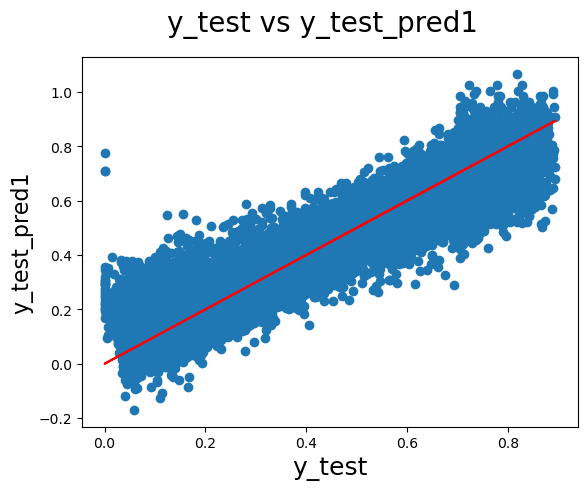

In [151]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(TEST_merged_df.Actual_LGD,TEST_y_test_pred4)
fig.suptitle('y_test vs y_test_pred1', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred1', fontsize=16)                          # Y-label
plt.plot(TEST_merged_df.Actual_LGD,TEST_merged_df.Actual_LGD, color='red')
plt.show

In [152]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(TEST_merged_df.Actual_LGD,TEST_y_test_pred4)
r_squared = r2_score(TEST_merged_df.Actual_LGD, TEST_y_test_pred4)

In [153]:
r_squared

0.8190394453410312

### So the r square value for both train and test dataset is above 80 % the model is good enough, important variables which are affecting targert variable are : 'number_of_loans', 'missed_repayments','vintage_in_months','tenure_years'

In [154]:
# Here are the values ppredicted by our model for the test dataset.
TEST_y_test_pred4

loan_acc_num
LN14086568    0.418301
LN37082418    0.782326
LN42963368    0.428643
LN54572294    0.730772
LN65792799    0.232345
                ...   
LN25049248    0.245038
LN90616761    0.553836
LN43072538    0.068623
LN37781669    0.234520
LN20788592    0.728688
Length: 9943, dtype: float64